# Pymaceuticals Inc.
---

### Analysis

- Observations
1. There is very strong positive correlation between the weight and average tumor volume for capomulin
2. Tumor volume shows a significant drop from the timepoint 30 ongoing for mouse treated with capomlin.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
print(pymaceuticals_data_complete.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [9]:
# Checking the number of mice.
mice_count = pymaceuticals_data_complete["Mouse ID"].nunique()
mice_count

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = pymaceuticals_data_complete[pymaceuticals_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = pymaceuticals_data_complete[pymaceuticals_data_complete['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = pymaceuticals_data_complete.drop(pymaceuticals_data_complete[pymaceuticals_data_complete['Mouse ID'] == 'g989'].index)
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
mice_count = cleaned_data["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_Tumor_Volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume	= cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": Mean_Tumor_Volume,
    "Median Tumor Volume": Median_Tumor_Volume,
    "Variance Tumor Volume": variance_tumor_volume,
    "std_dev_tumor_volume": std_dev_tumor_volume,
    "sem_tumor_volume": sem_tumor_volume
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,std_dev_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    Varianc_Tumor_Volume=('Tumor Volume (mm3)', 'var'),
    Std_dev_Tumor_Volume=('Tumor Volume (mm3)', 'std'),
    Sem_Tumor_Volume=('Tumor Volume (mm3)', 'sem')
).reset_index()
summary_stats

,Drug Regimen,mean_tumor_volume,median_tumor_volume,Varianc_Tumor_Volume,Std_dev_Tumor_Volume,Sem_Tumor_Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
regimen_counts 

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

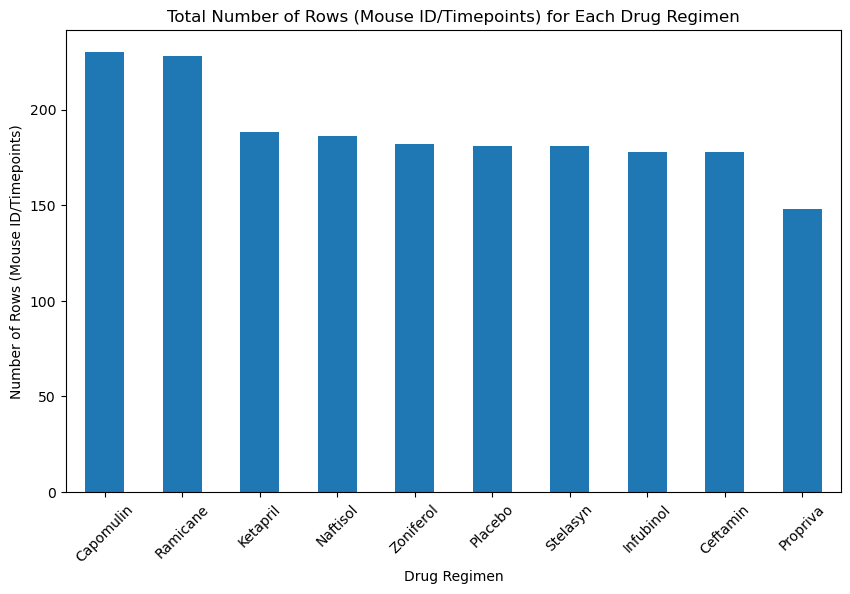

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10,6))
regimen_counts.plot(kind='bar')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()


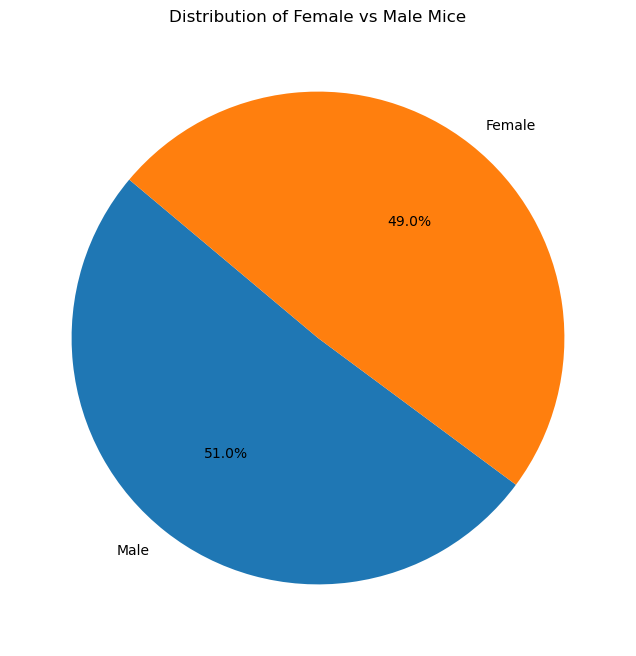

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8,8), title='Distribution of Female vs Male Mice')
plt.ylabel('') 
plt.show()

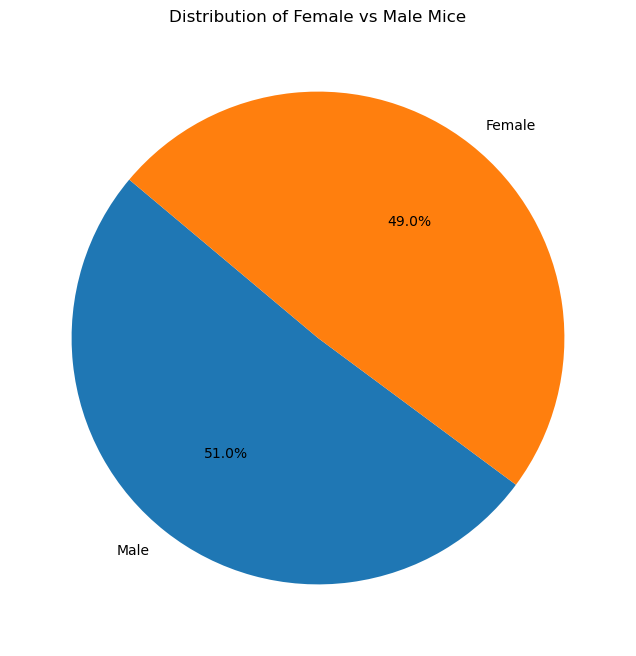

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = cleaned_data['Sex'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(regimens)]

last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [7]:
# Put treatments into a list for for loop (and later for plot labels)
# Determine outliers using upper and lower bounds
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bound


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual dataset)
data = pd.DataFrame({
    'Drug': ['Drug A', 'Drug A', 'Drug A', 'Drug B', 'Drug B', 'Drug C'],
    'Tumor Volume (mm3)': [45, 50, 55, 60, 65, 70]
})

# Step 1: Put treatments into a list for for loop (and later for plot labels)
treatments = data['Drug'].unique()

# Step 2: Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Step 3: Calculate the IQR and determine outliers
for treatment in treatments:
    # Filter data for the current treatment
    treatment_data = data[data['Drug'] == treatment]['Tumor Volume (mm3)']
    
    # Append subset data to tumor_volumes list
    tumor_volumes.append(treatment_data)
    
    # Calculate quartiles, IQR and bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Print results
    print(f"Statistics for {treatment}:")
    print(f" - Lower Quartile: {lower_quartile}")
    print(f" - Upper Quartile: {upper_quartile}")
    print(f" - Interquartile Range (IQR): {iqr}")
    print(f" - Potential outliers: {treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)].tolist()}")
    print("\n")
    

Statistics for Drug A:
 - Lower Quartile: 47.5
 - Upper Quartile: 52.5
 - Interquartile Range (IQR): 5.0
 - Potential outliers: []


Statistics for Drug B:
 - Lower Quartile: 61.25
 - Upper Quartile: 63.75
 - Interquartile Range (IQR): 2.5
 - Potential outliers: []


Statistics for Drug C:
 - Lower Quartile: 70.0
 - Upper Quartile: 70.0
 - Interquartile Range (IQR): 0.0
 - Potential outliers: []




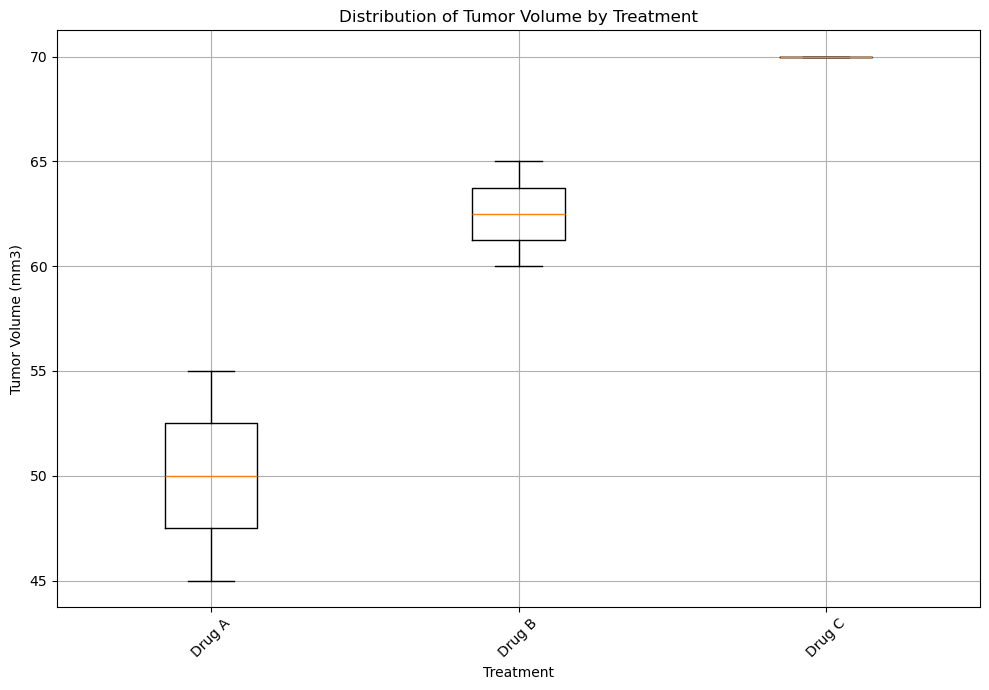

In [6]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(tumor_volumes, labels=treatments)
ax.set_title('Distribution of Tumor Volume by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensures labels are not cut off
plt.grid(True)  # Add gridlines for better readability
plt.show()

## Line and Scatter Plots

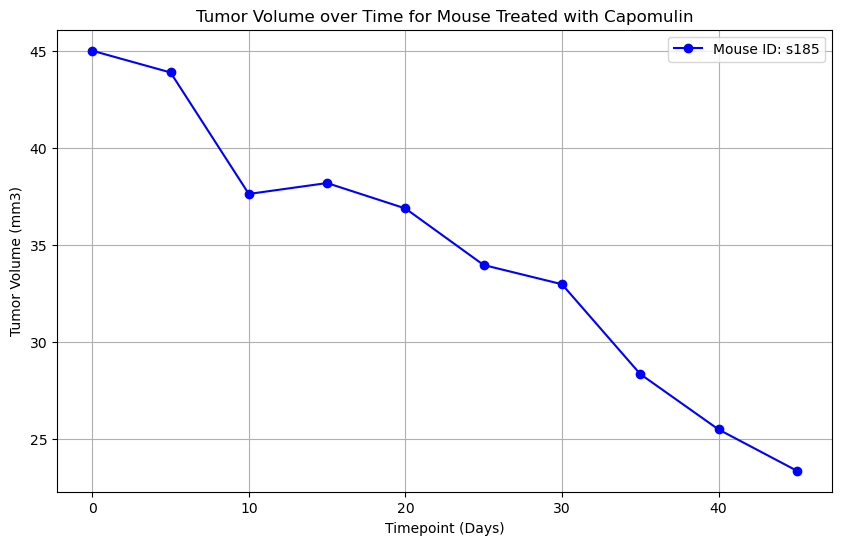

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


# Filter data for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse (for example, the first mouse in the filtered data)
mouse_id = capomulin_data['Mouse ID'].iloc[0]

# Filter data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse ID: {mouse_id}')
plt.title('Tumor Volume over Time for Mouse Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


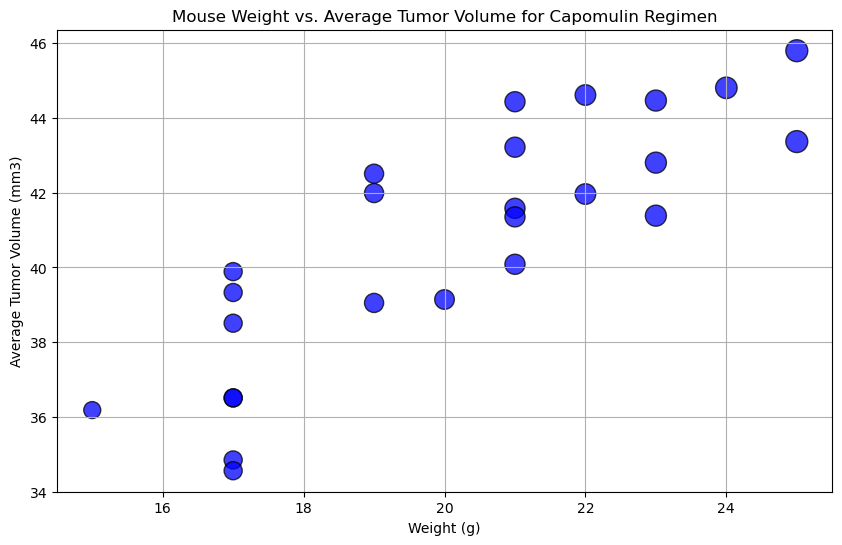

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=mouse_weights*10, alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

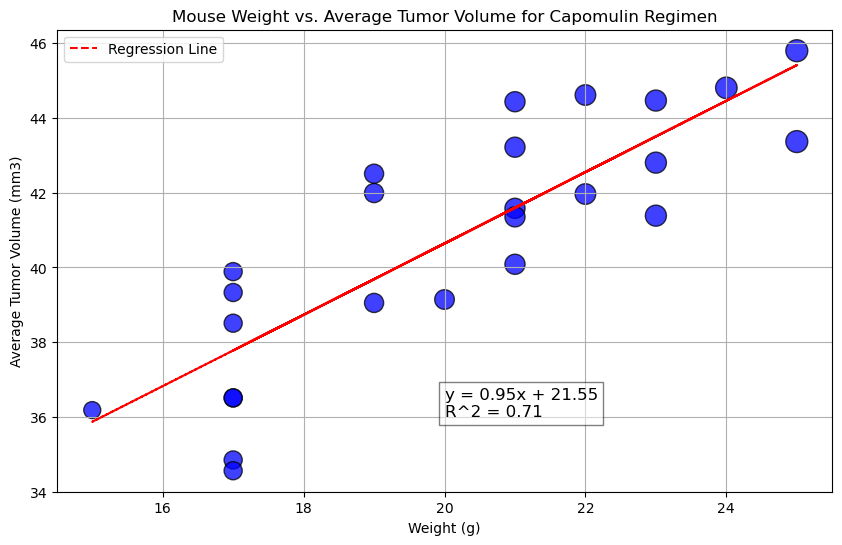

Correlation Coefficient: 0.84


In [46]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve the corresponding weights for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate correlation coefficient
correlation = np.corrcoef(mouse_weights, avg_tumor_volume)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_volume)

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=mouse_weights*10, alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plotting the regression line
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red', linestyle='--', label='Regression Line')

# Display equation of the regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}\nR^2 = {r_value**2:.2f}'
plt.text(20, 36, equation, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation:.2f}")
